# Creating Word Vectors with word2vec

**N.B.**: use "`git pull`" anywhere in the `nyc-ds-academy` directory to update to latest notebooks

#### Load dependencies

In [1]:
import nltk
from nltk import word_tokenize, sent_tokenize
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook
from bokeh.plotting import show, figure
%matplotlib inline

Using TensorFlow backend.


In [2]:
nltk.download('punkt') # English-language sentence tokenizer (not all periods end sentences; not all sentences start with a capital letter)

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

#### Load data

In [3]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

In [4]:
from nltk.corpus import gutenberg

In [5]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [6]:
len(gutenberg.fileids())

18

#### Tokenize text

In [7]:
gberg_sent_tokens = sent_tokenize(gutenberg.raw())

In [8]:
gberg_sent_tokens[0:5]

['[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.',
 "She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period.",
 'Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.',
 "Sixteen years had Miss Taylor been in Mr. Woodhouse's family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.",
 'Between _them_ it was more the intimacy\nof sisters.']

In [9]:
gberg_sent_tokens[1]

"She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period."

In [10]:
word_tokenize(gberg_sent_tokens[1])

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'s",
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [11]:
word_tokenize(gberg_sent_tokens[1])[14]

'father'

In [12]:
# a convenient method that handles newlines, as well as tokenizing sentences and words in one shot
gberg_sents = gutenberg.sents()

In [13]:
gberg_sents[0:5]

[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']'],
 ['VOLUME', 'I'],
 ['CHAPTER', 'I'],
 ['Emma',
  'Woodhouse',
  ',',
  'handsome',
  ',',
  'clever',
  ',',
  'and',
  'rich',
  ',',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  ',',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  ';',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  '-',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her',
  '.'],
 ['She',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  ',',
  'indulgent',
  'father',
  ';',
  'and',
  'had',
  ',',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  "'",
  's',
  'marriage',
  ',',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period',
  '.']]

In [14]:
gberg_sents[4]

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [15]:
gberg_sents[4][14]

'father'

#### Run word2vec

In [17]:
# model = Word2Vec(sentences=gberg_sents, size=64, sg=1, window=10, min_count=5, seed=42, workers=8)

In [18]:
# model.save('../raw_gutenberg_model.w2v')

#### Explore model

In [19]:
# skip re-training the model with the next line:  
model = gensim.models.Word2Vec.load('../raw_gutenberg_model.w2v')

In [20]:
model['dog']

array([ 0.26904255, -0.1621359 ,  0.3750256 , -0.45720032,  0.11301365,
        0.38777879,  0.07985851, -0.41821676,  0.25089404,  0.33926705,
       -0.080161  , -0.41848078, -0.11926382,  0.05567036,  0.17746113,
        0.48711824, -0.07987826,  0.24794155,  0.51635629,  0.28091279,
       -0.02160198, -0.21664959, -0.16267581, -0.30657738, -0.05135779,
       -0.0717189 , -0.23059118,  0.39070779, -0.02148601, -0.02437739,
       -0.24497117, -0.21258108, -0.04940053,  0.47320694, -0.29593673,
       -0.3120383 , -0.16338396, -0.11775671,  0.09429431, -0.62936276,
        0.56831205, -0.04018871,  0.05976823,  0.29181743, -0.01939399,
        0.06972519, -0.29290241, -0.05240246,  0.26122624,  0.04284862,
       -0.10525419, -0.24352749,  0.34333584, -0.46437535,  0.81177765,
       -0.00473523, -0.38881841, -0.02673459, -0.40746167,  0.11519276,
        0.26032686,  0.12146576, -0.41793686,  0.24636635], dtype=float32)

In [21]:
len(model['dog'])

64

In [22]:
model.most_similar('dog') # distance

[('puppy', 0.8137584328651428),
 ('broth', 0.7907859683036804),
 ('cage', 0.7828431725502014),
 ('sweeper', 0.7751598358154297),
 ('pig', 0.7609682679176331),
 ('pet', 0.7605292797088623),
 ('boy', 0.7512097358703613),
 ('cow', 0.7502828240394592),
 ('fox', 0.745104968547821),
 ('Truck', 0.7432427406311035)]

In [23]:
model.most_similar('think')

[('manage', 0.849516749382019),
 ('suppose', 0.8426423072814941),
 ('know', 0.8389058709144592),
 ('contradict', 0.8207963705062866),
 ('NOW', 0.8158916234970093),
 ('Mamma', 0.8147774934768677),
 ('interfere', 0.8047748804092407),
 ('imagine', 0.8041163682937622),
 ('anyhow', 0.8036106824874878),
 ('believe', 0.8022602796554565)]

In [24]:
model.most_similar('day')

[('morning', 0.7969126105308533),
 ('night', 0.7783966064453125),
 ('time', 0.7478375434875488),
 ('month', 0.7393653392791748),
 ('week', 0.7346140742301941),
 ('evening', 0.704649806022644),
 ('feasting', 0.7016774415969849),
 ('Saturday', 0.6912297606468201),
 ('Adar', 0.6819364428520203),
 ('seventh', 0.675483226776123)]

In [25]:
model.most_similar('father')

[('mother', 0.8784882426261902),
 ('brother', 0.8613675236701965),
 ('wife', 0.7934472560882568),
 ('sister', 0.7911010980606079),
 ('daughter', 0.785748302936554),
 ('Amnon', 0.776392936706543),
 ('Tamar', 0.7663865089416504),
 ('servant', 0.7563588619232178),
 ('uncle', 0.7395140528678894),
 ('bondwoman', 0.7374235391616821)]

In [26]:
model.most_similar('broth')

[('poisoned', 0.8916468024253845),
 ('slice', 0.8743618130683899),
 ('basin', 0.8612580299377441),
 ('pepper', 0.8564265966415405),
 ('shell', 0.8563050031661987),
 ('shure', 0.8496631383895874),
 ('bun', 0.8453623056411743),
 ('Lightfoot', 0.8451728820800781),
 ('mandarin', 0.8446893095970154),
 ('cowslip', 0.8435923457145691)]

In [27]:
# close, but not quite; distinctly in female direction: 
model.most_similar(positive=['father', 'woman'], negative=['man']) 

[('sister', 0.7926232218742371),
 ('daughter', 0.7917730808258057),
 ('wife', 0.7815544605255127),
 ('husband', 0.7808158993721008),
 ('mother', 0.7753645181655884),
 ('brother', 0.7328757047653198),
 ('Tamar', 0.732427716255188),
 ('conceived', 0.717141330242157),
 ('Sarah', 0.7118659019470215),
 ('Rachel', 0.7106494903564453)]

In [29]:
model.most_similar(positive=['king', 'woman'], negative=['man'], topn=50) 

[('Rachel', 0.7507852911949158),
 ('Pharaoh', 0.7350609302520752),
 ('Sarah', 0.7345616817474365),
 ('Leah', 0.7254290580749512),
 ('Laban', 0.7232168912887573),
 ('Rebekah', 0.7184093594551086),
 ('Hagar', 0.7087153792381287),
 ('Padanaram', 0.7086805105209351),
 ('Abram', 0.7034566402435303),
 ('Bilhah', 0.6920945644378662),
 ('Solomon', 0.6878252029418945),
 ('Abimelech', 0.6848732233047485),
 ('Hamor', 0.6816117763519287),
 ('Esau', 0.6815595626831055),
 ('Zilpah', 0.6792290210723877),
 ('Jerubbaal', 0.6787564754486084),
 ('conceived', 0.6777492761611938),
 ('Onan', 0.674083411693573),
 ('daughter', 0.6740672588348389),
 ('Bethuel', 0.6726176142692566),
 ('Ephron', 0.6718195080757141),
 ('Sarai', 0.6691693067550659),
 ('damsel', 0.6690042018890381),
 ('Judah', 0.6685984134674072),
 ('Shechem', 0.6679830551147461),
 ('birthright', 0.6656962037086487),
 ('Lot', 0.6613132953643799),
 ('household', 0.6583735346794128),
 ('Mephibosheth', 0.6569991707801819),
 ('Babylon', 0.6507256031036

In [ ]:
# impressive for such a small data set, without any cleaning, e.g., to lower case (covered next)

#### Reduce word vector dimensionality with t-SNE

In [30]:
model.wv.vocab

{'[': <gensim.models.keyedvectors.Vocab at 0x7f4c1ac84a58>,
 'Emma': <gensim.models.keyedvectors.Vocab at 0x7f4c1ac84278>,
 'by': <gensim.models.keyedvectors.Vocab at 0x7f4c1ac84978>,
 'Jane': <gensim.models.keyedvectors.Vocab at 0x7f4c1ac84550>,
 ']': <gensim.models.keyedvectors.Vocab at 0x7f4c1ac84860>,
 'I': <gensim.models.keyedvectors.Vocab at 0x7f4c1ac84940>,
 'CHAPTER': <gensim.models.keyedvectors.Vocab at 0x7f4c1bf62048>,
 'Woodhouse': <gensim.models.keyedvectors.Vocab at 0x7f4c1ab57be0>,
 ',': <gensim.models.keyedvectors.Vocab at 0x7f4c1ab57518>,
 'handsome': <gensim.models.keyedvectors.Vocab at 0x7f4c1ab570b8>,
 'clever': <gensim.models.keyedvectors.Vocab at 0x7f4c1ab57d68>,
 'and': <gensim.models.keyedvectors.Vocab at 0x7f4c1ab57dd8>,
 'rich': <gensim.models.keyedvectors.Vocab at 0x7f4c1ab57e48>,
 'with': <gensim.models.keyedvectors.Vocab at 0x7f4c1ab579b0>,
 'a': <gensim.models.keyedvectors.Vocab at 0x7f4c1ab574e0>,
 'comfortable': <gensim.models.keyedvectors.Vocab at 0x7f4c

In [31]:
len(model.wv.vocab)

17011

In [ ]:
# X = model[model.wv.vocab]

In [ ]:
# tsne = TSNE(n_components=2, n_iter=1000) # 200 is minimum iter; default is 1000

In [ ]:
# X_2d = tsne.fit_transform(X)

In [ ]:
# coords_df = pd.DataFrame(X_2d, columns=['x','y'])
# coords_df['token'] = model.wv.vocab.keys()

In [ ]:
# coords_df.to_csv('../raw_gutenberg_tsne.csv', index=False)

#### Visualize 2D representation of word vectors

In [32]:
coords_df = pd.read_csv('./raw_gutenberg_tsne.csv')

In [34]:
coords_df.head()

,x,y,token
0,4.736166,0.330797,[
1,2.382989,-4.162857,Emma
2,-5.468009,-2.095312,by
3,2.030853,-4.465032,Jane
4,4.746364,0.328226,]


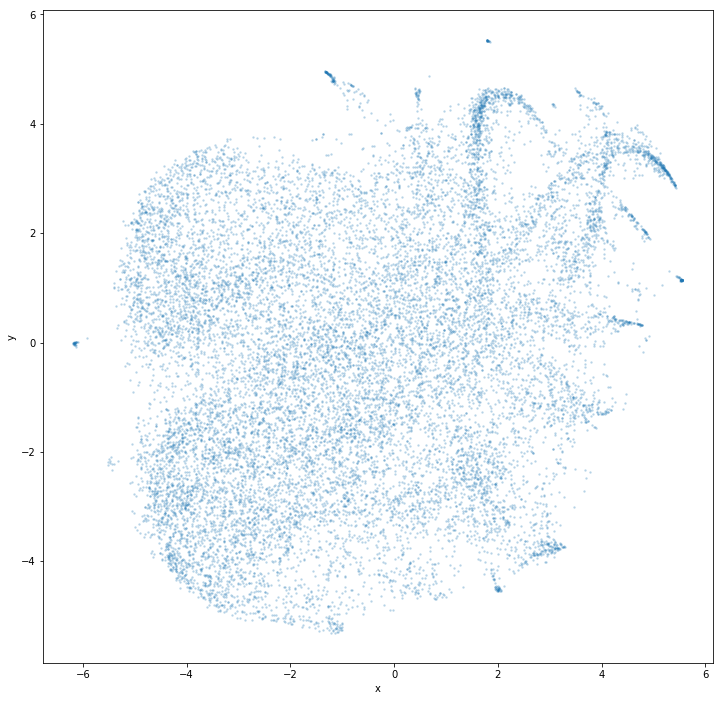

In [33]:
_ = coords_df.plot.scatter('x', 'y', figsize=(12,12), marker='.', s=10, alpha=0.2)

In [35]:
output_notebook() # output bokeh plots inline in notebook

Loading BokehJS ...

In [36]:
subset_df = coords_df.sample(n=5000)

In [37]:
p = figure(plot_width=800, plot_height=800)
_ = p.text(x=subset_df.x, y=subset_df.y, text=subset_df.token)

In [38]:
show(p)